In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries loaded successfully!")

Matplotlib is building the font cache; this may take a moment.


All libraries loaded successfully!


In [3]:
import os
print("Current directory: {}".format(os.getcwd()))
print("")
print("Files in project folder:")
for root, dirs, files in os.walk(".."):
    for file in files:
        if file.endswith(('.csv', '.json')):
            print(os.path.join(root, file))

Current directory: /Users/kethavathsaidamma/Desktop/data-wrangling-portfolio/01-log-file-cleaner

Files in project folder:
../01-log-file-cleaner/raw_data/messy_server_logs.csv
../01-log-file-cleaner/raw_data/messy_api_logs.json
../01-log-file-cleaner/venv/etc/jupyter/nbconfig/notebook.d/widgetsnbextension.json
../01-log-file-cleaner/venv/etc/jupyter/jupyter_server_config.d/notebook_shim.json
../01-log-file-cleaner/venv/etc/jupyter/jupyter_server_config.d/notebook.json
../01-log-file-cleaner/venv/etc/jupyter/jupyter_server_config.d/jupyterlab.json
../01-log-file-cleaner/venv/etc/jupyter/jupyter_server_config.d/jupyter_server_terminals.json
../01-log-file-cleaner/venv/etc/jupyter/jupyter_server_config.d/jupyter-lsp-jupyter-server.json
../01-log-file-cleaner/venv/etc/jupyter/jupyter_notebook_config.d/jupyterlab.json
../01-log-file-cleaner/venv/lib/python3.14/site-packages/nbformat/v4/nbformat.v4.0.schema.json
../01-log-file-cleaner/venv/lib/python3.14/site-packages/nbformat/v4/nbformat.v

In [4]:
import os
print("Current directory: {}".format(os.getcwd()))

if os.path.exists("raw_data/messy_server_logs.csv"):
    print("File found at: raw_data/messy_server_logs.csv")
    path_prefix = ""
elif os.path.exists("../raw_data/messy_server_logs.csv"):
    print("File found at: ../raw_data/messy_server_logs.csv")
    path_prefix = "../"
else:
    print("File NOT found! Let me search...")
    for root, dirs, files in os.walk("/Users/kethavathsaidamma/Desktop/data-wrangling-portfolio"):
        for file in files:
            print(os.path.join(root, file))

Current directory: /Users/kethavathsaidamma/Desktop/data-wrangling-portfolio/01-log-file-cleaner
File found at: raw_data/messy_server_logs.csv


In [5]:
df_csv = pd.read_csv("raw_data/messy_server_logs.csv")

with open("raw_data/messy_api_logs.json", "r") as f:
    json_data = json.load(f)
df_json = pd.DataFrame(json_data)

print("CSV Data Shape: {}".format(df_csv.shape))
print("JSON Data Shape: {}".format(df_json.shape))
print("")
print("CSV Columns: {}".format(list(df_csv.columns)))
print("")
print("First 5 rows of CSV data:")
df_csv.head()

CSV Data Shape: (5250, 10)
JSON Data Shape: (1000, 10)

CSV Columns: ['log_id', 'timestamp', 'error_type', 'severity', 'module', 'environment', 'user_id', 'response_time_ms', 'message', 'ip_address']

First 5 rows of CSV data:


,log_id,timestamp,error_type,severity,module,environment,user_id,response_time_ms,message,ip_address
0,4038,NaN,Network Timeout,med,api-gateway,DEV,NaN,99999.0,Error in module at line 63: File Not Found,192.168.92.207
1,3549,04-May-2024 18:26:00,Network Timeout,P2,api-gateway,dev,NaN,NaN,Error in module at line 166: System Crash,10.0.210.255
2,3828,02-Mar-2024 22:30:00,Network Timeout,CRITICAL,api-gateway,staging,2365,-1.0,Error in module at line 128: Network Timeout,NaN
3,1301,01/25/2024 04:26,Authentication Failure,Medium,NaN,production,4806,-1.0,Error in module at line 385: Performance Degra...,0.0.0.0
4,1486,11/20/2024 21:45,Authentication Failure,High,auth-service,prod,6591,NaN,Error in module at line 157: API Timeout,INVALID_IP


In [6]:
print("=" * 60)
print("DATA QUALITY REPORT - RAW DATA")
print("=" * 60)

print("\n1. SHAPE")
print("   Rows: {}".format(df_csv.shape[0]))
print("   Columns: {}".format(df_csv.shape[1]))

print("\n2. DATA TYPES")
print(df_csv.dtypes)

print("\n3. MISSING VALUES")
missing = df_csv.isnull().sum()
missing_pct = round(df_csv.isnull().sum() / len(df_csv) * 100, 2)
missing_report = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_pct
})
print(missing_report)

print("\n4. DUPLICATE ROWS")
duplicates = df_csv.duplicated().sum()
print("   Duplicate rows: {}".format(duplicates))
print("   Percentage: {}%".format(
    round(duplicates / len(df_csv) * 100, 2)
))

DATA QUALITY REPORT - RAW DATA

1. SHAPE
   Rows: 5250
   Columns: 10

2. DATA TYPES
log_id                int64
timestamp               str
error_type              str
severity                str
module                  str
environment             str
user_id                 str
response_time_ms    float64
message                 str
ip_address              str
dtype: object

3. MISSING VALUES
                  Missing Count  Missing Percentage
log_id                        0                0.00
timestamp                  1036               19.73
error_type                    0                0.00
severity                    393                7.49
module                      668               12.72
environment                 481                9.16
user_id                    2168               41.30
response_time_ms           1460               27.81
message                       0                0.00
ip_address                 1082               20.61

4. DUPLICATE ROWS
   Duplicat

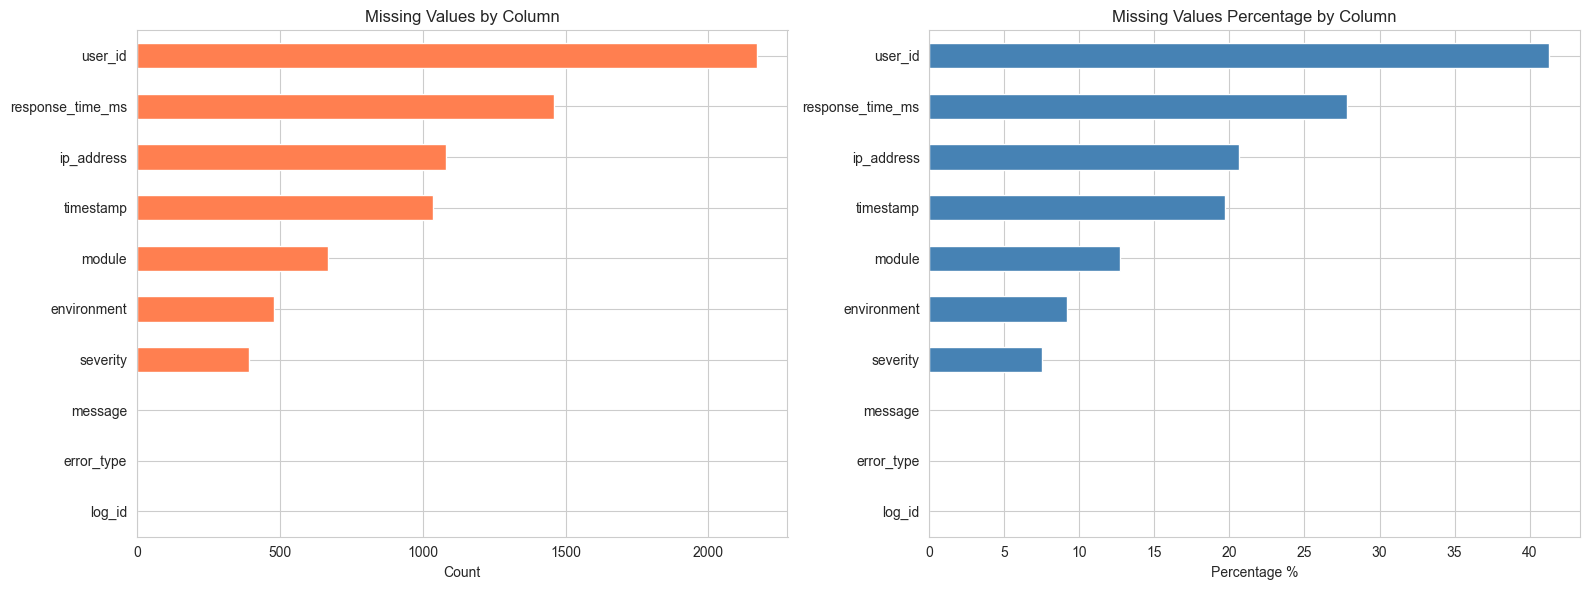

Chart saved to metadata/missing_values_chart.png


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

missing_counts = df_csv.isnull().sum().sort_values(ascending=True)
missing_counts.plot(
    kind='barh',
    ax=axes[0],
    color='coral'
)
axes[0].set_title("Missing Values by Column")
axes[0].set_xlabel("Count")

missing_pct_vals = (
    df_csv.isnull().sum() / len(df_csv) * 100
).sort_values(ascending=True)
missing_pct_vals.plot(
    kind='barh',
    ax=axes[1],
    color='steelblue'
)
axes[1].set_title("Missing Values Percentage by Column")
axes[1].set_xlabel("Percentage %")

plt.tight_layout()
plt.savefig("metadata/missing_values_chart.png", dpi=150)
plt.show()
print("Chart saved to metadata/missing_values_chart.png")

In [8]:
print("=" * 60)
print("DETAILED DATA QUALITY ISSUES")
print("=" * 60)

print("\n1. TIMESTAMP FORMATS (first 10 unique)")
print(df_csv['timestamp'].dropna().unique()[:10])

print("\n2. SEVERITY LEVELS (all unique)")
print(df_csv['severity'].dropna().unique())

print("\n3. ENVIRONMENT VALUES (all unique)")
print(df_csv['environment'].dropna().unique())

print("\n4. USER_ID FORMATS (first 10 unique)")
print(df_csv['user_id'].dropna().unique()[:10])

print("\n5. RESPONSE_TIME_MS VALUES (problematic ones)")
print("   Contains 'N/A': {}".format(
    (df_csv['response_time_ms'] == 'N/A').sum()
))
print("   Contains -1: {}".format(
    (df_csv['response_time_ms'] == -1).sum()
))
print("   Contains 0: {}".format(
    (df_csv['response_time_ms'] == 0).sum()
))
print("   Contains 99999: {}".format(
    (df_csv['response_time_ms'] == 99999).sum()
))

print("\n6. IP ADDRESS VALUES (problematic ones)")
print("   Contains 'INVALID_IP': {}".format(
    (df_csv['ip_address'] == 'INVALID_IP').sum()
))
print("   Contains '0.0.0.0': {}".format(
    (df_csv['ip_address'] == '0.0.0.0').sum()
))

DETAILED DATA QUALITY ISSUES

1. TIMESTAMP FORMATS (first 10 unique)
<ArrowStringArray>
['04-May-2024 18:26:00', '02-Mar-2024 22:30:00',     '01/25/2024 04:26',
     '11/20/2024 21:45', '15-Dec-2024 17:31:00',  '2024-06-10 22:05:00',
         '1715501640.0',  '2024-02-16 03:53:00',  '2024-10-17 03:07:00',
     '08/02/2024 23:27']
Length: 10, dtype: str

2. SEVERITY LEVELS (all unique)
<ArrowStringArray>
[     'med',       'P2', 'CRITICAL',   'Medium',     'High',     'high',
       'P1', 'Critical',       'P3',       'P4',      'LOW',      'Low']
Length: 12, dtype: str

3. ENVIRONMENT VALUES (all unique)
<ArrowStringArray>
[        'DEV',         'dev',     'staging',  'production',        'prod',
 'development',  'PRODUCTION',         'stg',     'Staging']
Length: 9, dtype: str

4. USER_ID FORMATS (first 10 unique)
<ArrowStringArray>
[    '2365',     '4806',     '6591',     '3787',     '2897',  'UNKNOWN',
 'USR-8313', 'USR-3057',     '8921',     '9012']
Length: 10, dtype: str

5. RESP

In [9]:
df_clean = df_csv.copy()

cleaning_log = []

def log_change(step, description, rows_before, rows_after, rows_affected):
    cleaning_log.append({
        "step": step,
        "description": description,
        "rows_before": rows_before,
        "rows_after": rows_after,
        "rows_affected": rows_affected
    })
    print("STEP {}: {}".format(step, description))
    print("   Rows affected: {}".format(rows_affected))
    print("   Rows: {} -> {}".format(rows_before, rows_after))
    print("")

print("Created clean copy of data")
print("Shape: {}".format(df_clean.shape))

Created clean copy of data
Shape: (5250, 10)


In [10]:
rows_before = len(df_clean)

df_clean = df_clean.drop_duplicates()

rows_after = len(df_clean)

log_change(
    step=1,
    description="Removed duplicate rows",
    rows_before=rows_before,
    rows_after=rows_after,
    rows_affected=rows_before - rows_after
)

STEP 1: Removed duplicate rows
   Rows affected: 250
   Rows: 5250 -> 5000



In [11]:
print("BEFORE cleaning severity:")
print(df_clean['severity'].value_counts(dropna=False))
print("")

severity_mapping = {
    "Critical": "Critical",
    "CRITICAL": "Critical",
    "P1": "Critical",
    "High": "High",
    "high": "High",
    "P2": "High",
    "Medium": "Medium",
    "med": "Medium",
    "P3": "Medium",
    "Low": "Low",
    "LOW": "Low",
    "P4": "Low"
}

rows_before = len(df_clean)
affected = df_clean['severity'].notna().sum()

df_clean['severity'] = df_clean['severity'].map(severity_mapping)

log_change(
    step=2,
    description="Standardized severity levels to Critical/High/Medium/Low",
    rows_before=rows_before,
    rows_after=len(df_clean),
    rows_affected=affected
)

print("AFTER cleaning severity:")
print(df_clean['severity'].value_counts(dropna=False))

BEFORE cleaning severity:
severity
high        419
P3          419
med         393
P2          393
P4          391
High        390
LOW         381
Critical    380
NaN         378
CRITICAL    377
P1          374
Medium      367
Low         338
Name: count, dtype: int64

STEP 2: Standardized severity levels to Critical/High/Medium/Low
   Rows affected: 4622
   Rows: 5000 -> 5000

AFTER cleaning severity:
severity
High        1202
Medium      1179
Critical    1131
Low         1110
NaN          378
Name: count, dtype: int64


In [12]:
print("BEFORE cleaning environment:")
print(df_clean['environment'].value_counts(dropna=False))
print("")

environment_mapping = {
    "production": "production",
    "PRODUCTION": "production",
    "prod": "production",
    "staging": "staging",
    "Staging": "staging",
    "stg": "staging",
    "development": "development",
    "dev": "development",
    "DEV": "development"
}

rows_before = len(df_clean)
affected = df_clean['environment'].notna().sum()

df_clean['environment'] = df_clean['environment'].map(environment_mapping)

log_change(
    step=3,
    description="Standardized environment names to production/staging/development",
    rows_before=rows_before,
    rows_after=len(df_clean),
    rows_affected=affected
)

print("AFTER cleaning environment:")
print(df_clean['environment'].value_counts(dropna=False))

BEFORE cleaning environment:
environment
DEV            532
production     526
dev            519
prod           502
development    501
stg            495
PRODUCTION     493
Staging        489
staging        484
NaN            459
Name: count, dtype: int64

STEP 3: Standardized environment names to production/staging/development
   Rows affected: 4541
   Rows: 5000 -> 5000

AFTER cleaning environment:
environment
development    1552
production     1521
staging        1468
NaN             459
Name: count, dtype: int64


In [13]:
def parse_timestamp(ts):
    if pd.isna(ts):
        return pd.NaT
    ts = str(ts).strip()
    if ts == "INVALID_TIME":
        return pd.NaT
    try:
        return pd.to_datetime(float(ts), unit='s')
    except (ValueError, OverflowError):
        pass
    try:
        return pd.to_datetime(ts)
    except Exception:
        return pd.NaT

print("BEFORE cleaning timestamps:")
print("Missing: {}".format(df_clean['timestamp'].isna().sum()))
print("Sample formats:")
print(df_clean['timestamp'].dropna().head(5).values)
print("")

rows_before = len(df_clean)
df_clean['timestamp'] = df_clean['timestamp'].apply(parse_timestamp)

invalid_after = df_clean['timestamp'].isna().sum()

log_change(
    step=4,
    description="Standardized all timestamps to datetime format",
    rows_before=rows_before,
    rows_after=len(df_clean),
    rows_affected=rows_before
)

print("AFTER cleaning timestamps:")
print("Missing/Unparseable: {}".format(invalid_after))
print("Sample cleaned timestamps:")
print(df_clean['timestamp'].dropna().head(5).values)

BEFORE cleaning timestamps:
Missing: 985
Sample formats:
<ArrowStringArray>
['04-May-2024 18:26:00', '02-Mar-2024 22:30:00',     '01/25/2024 04:26',
     '11/20/2024 21:45', '15-Dec-2024 17:31:00']
Length: 5, dtype: str

STEP 4: Standardized all timestamps to datetime format
   Rows affected: 5000
   Rows: 5000 -> 5000

AFTER cleaning timestamps:
Missing/Unparseable: 1079
Sample cleaned timestamps:
['2024-05-04T18:26:00.000000' '2024-03-02T22:30:00.000000'
 '2024-01-25T04:26:00.000000' '2024-11-20T21:45:00.000000'
 '2024-12-15T17:31:00.000000']


In [14]:
print("BEFORE cleaning response_time_ms:")
print("Dtype: {}".format(df_clean['response_time_ms'].dtype))
print("")

df_clean['response_time_ms'] = pd.to_numeric(
    df_clean['response_time_ms'], errors='coerce'
)

before_invalid = len(df_clean)
invalid_mask = (
    (df_clean['response_time_ms'] < 0) |
    (df_clean['response_time_ms'] == 0) |
    (df_clean['response_time_ms'] > 10000)
)
invalid_count = invalid_mask.sum()

df_clean.loc[invalid_mask, 'response_time_ms'] = np.nan

log_change(
    step=5,
    description="Cleaned response_time_ms: removed negative, zero, and outlier values (>10000ms)",
    rows_before=before_invalid,
    rows_after=len(df_clean),
    rows_affected=int(invalid_count)
)

print("AFTER cleaning response_time_ms:")
print("Valid values remaining: {}".format(
    df_clean['response_time_ms'].notna().sum()
))
print("Min: {}".format(df_clean['response_time_ms'].min()))
print("Max: {}".format(df_clean['response_time_ms'].max()))
print("Mean: {}".format(
    round(df_clean['response_time_ms'].mean(), 2)
))

BEFORE cleaning response_time_ms:
Dtype: float64

STEP 5: Cleaned response_time_ms: removed negative, zero, and outlier values (>10000ms)
   Rows affected: 2223
   Rows: 5000 -> 5000

AFTER cleaning response_time_ms:
Valid values remaining: 1383
Min: 10.75
Max: 4996.0
Mean: 2480.81


In [15]:
import re

def clean_ip(ip):
    if pd.isna(ip):
        return np.nan
    ip = str(ip).strip()
    if ip in ["INVALID_IP", "0.0.0.0", ""]:
        return np.nan
    ip_pattern = r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$'
    if re.match(ip_pattern, ip):
        return ip
    return np.nan

print("BEFORE cleaning ip_address:")
print("Missing: {}".format(df_clean['ip_address'].isna().sum()))
print("")

rows_before = len(df_clean)
before_missing = df_clean['ip_address'].isna().sum()

df_clean['ip_address'] = df_clean['ip_address'].apply(clean_ip)

after_missing = df_clean['ip_address'].isna().sum()

log_change(
    step=6,
    description="Cleaned IP addresses: removed INVALID_IP and 0.0.0.0",
    rows_before=rows_before,
    rows_after=len(df_clean),
    rows_affected=int(after_missing - before_missing)
)

print("AFTER cleaning ip_address:")
print("Missing: {}".format(df_clean['ip_address'].isna().sum()))
print("Sample valid IPs:")
print(df_clean['ip_address'].dropna().head(5).values)

BEFORE cleaning ip_address:
Missing: 1029

STEP 6: Cleaned IP addresses: removed INVALID_IP and 0.0.0.0
   Rows affected: 1998
   Rows: 5000 -> 5000

AFTER cleaning ip_address:
Missing: 3027
Sample valid IPs:
<ArrowStringArray>
['192.168.92.207',   '10.0.210.255',    '10.0.12.225',   '10.0.151.155',
  '192.168.92.22']
Length: 5, dtype: str


In [16]:
def clean_user_id(uid):
    if pd.isna(uid):
        return np.nan
    uid = str(uid).strip()
    if uid in ["UNKNOWN", "", "nan"]:
        return np.nan
    if uid.startswith("USR-"):
        return uid
    if uid.isdigit():
        return "USR-{}".format(uid)
    return np.nan

print("BEFORE cleaning user_id:")
print("Missing: {}".format(df_clean['user_id'].isna().sum()))
print("Sample values:")
print(df_clean['user_id'].dropna().unique()[:10])
print("")

rows_before = len(df_clean)
before_missing = df_clean['user_id'].isna().sum()

df_clean['user_id'] = df_clean['user_id'].apply(clean_user_id)

after_missing = df_clean['user_id'].isna().sum()

log_change(
    step=7,
    description="Standardized user IDs to USR-XXXX format, removed UNKNOWN and empty",
    rows_before=rows_before,
    rows_after=len(df_clean),
    rows_affected=int(after_missing - before_missing)
)

print("AFTER cleaning user_id:")
print("Missing: {}".format(df_clean['user_id'].isna().sum()))
print("Sample cleaned user IDs:")
print(df_clean['user_id'].dropna().unique()[:10])

BEFORE cleaning user_id:
Missing: 2064
Sample values:
<ArrowStringArray>
[    '2365',     '4806',     '6591',     '3787',     '2897',  'UNKNOWN',
 'USR-8313', 'USR-3057',     '8921',     '9012']
Length: 10, dtype: str

STEP 7: Standardized user IDs to USR-XXXX format, removed UNKNOWN and empty
   Rows affected: 965
   Rows: 5000 -> 5000

AFTER cleaning user_id:
Missing: 3029
Sample cleaned user IDs:
<ArrowStringArray>
['USR-2365', 'USR-4806', 'USR-6591', 'USR-3787', 'USR-2897', 'USR-8313',
 'USR-3057', 'USR-8921', 'USR-9012', 'USR-5296']
Length: 10, dtype: str


In [17]:
print("Missing values BEFORE filling:")
print(df_clean.isnull().sum())
print("")

df_clean['severity'] = df_clean['severity'].fillna("Unknown")
df_clean['module'] = df_clean['module'].fillna("unknown-module")
df_clean['environment'] = df_clean['environment'].fillna("unknown")

log_change(
    step=8,
    description="Filled missing categorical values with defaults",
    rows_before=len(df_clean),
    rows_after=len(df_clean),
    rows_affected=int(
        df_clean['severity'].eq("Unknown").sum() +
        df_clean['module'].eq("unknown-module").sum() +
        df_clean['environment'].eq("unknown").sum()
    )
)

print("Missing values AFTER filling:")
print(df_clean.isnull().sum())

Missing values BEFORE filling:
log_id                 0
timestamp           1079
error_type             0
severity             378
module               633
environment          459
user_id             3029
response_time_ms    3617
message                0
ip_address          3027
dtype: int64

STEP 8: Filled missing categorical values with defaults
   Rows affected: 1470
   Rows: 5000 -> 5000

Missing values AFTER filling:
log_id                 0
timestamp           1079
error_type             0
severity               0
module                 0
environment            0
user_id             3029
response_time_ms    3617
message                0
ip_address          3027
dtype: int64


In [18]:
print("=" * 60)
print("COMPLETE DATA CLEANING LOG")
print("=" * 60)

for entry in cleaning_log:
    print("")
    print("Step {}: {}".format(entry['step'], entry['description']))
    print("   Rows before: {}".format(entry['rows_before']))
    print("   Rows after: {}".format(entry['rows_after']))
    print("   Rows affected: {}".format(entry['rows_affected']))

print("")
print("=" * 60)
print("FINAL RESULT")
print("=" * 60)
print("Original rows: {}".format(len(df_csv)))
print("Cleaned rows: {}".format(len(df_clean)))
print("Rows removed: {}".format(len(df_csv) - len(df_clean)))
print("")
print("Cleaned data sample:")
df_clean.head(10)

COMPLETE DATA CLEANING LOG

Step 1: Removed duplicate rows
   Rows before: 5250
   Rows after: 5000
   Rows affected: 250

Step 2: Standardized severity levels to Critical/High/Medium/Low
   Rows before: 5000
   Rows after: 5000
   Rows affected: 4622

Step 3: Standardized environment names to production/staging/development
   Rows before: 5000
   Rows after: 5000
   Rows affected: 4541

Step 4: Standardized all timestamps to datetime format
   Rows before: 5000
   Rows after: 5000
   Rows affected: 5000

Step 5: Cleaned response_time_ms: removed negative, zero, and outlier values (>10000ms)
   Rows before: 5000
   Rows after: 5000
   Rows affected: 2223

Step 6: Cleaned IP addresses: removed INVALID_IP and 0.0.0.0
   Rows before: 5000
   Rows after: 5000
   Rows affected: 1998

Step 7: Standardized user IDs to USR-XXXX format, removed UNKNOWN and empty
   Rows before: 5000
   Rows after: 5000
   Rows affected: 965

Step 8: Filled missing categorical values with defaults
   Rows before

,log_id,timestamp,error_type,severity,module,environment,user_id,response_time_ms,message,ip_address
0,4038,NaT,Network Timeout,Medium,api-gateway,development,NaN,NaN,Error in module at line 63: File Not Found,192.168.92.207
1,3549,2024-05-04 18:26:00,Network Timeout,High,api-gateway,development,NaN,NaN,Error in module at line 166: System Crash,10.0.210.255
2,3828,2024-03-02 22:30:00,Network Timeout,Critical,api-gateway,staging,USR-2365,NaN,Error in module at line 128: Network Timeout,NaN
3,1301,2024-01-25 04:26:00,Authentication Failure,Medium,unknown-module,production,USR-4806,NaN,Error in module at line 385: Performance Degra...,NaN
4,1486,2024-11-20 21:45:00,Authentication Failure,High,auth-service,production,USR-6591,NaN,Error in module at line 157: API Timeout,NaN
5,3589,2024-12-15 17:31:00,Authentication Failure,High,user-dashboard,development,USR-3787,48.08,Error in module at line 342: Memory Leak,10.0.12.225
6,3235,2024-06-10 22:05:00,Authentication Failure,Medium,notification-service,development,NaN,NaN,Error in module at line 301: Network Timeout,NaN
7,2478,2024-05-12 08:14:00,File Not Found,Critical,notification-service,development,NaN,NaN,Error in module at line 166: Database Connecti...,NaN
8,3212,2024-02-16 03:53:00,File Not Found,Critical,auth-service,development,USR-2897,NaN,Error in module at line 195: Permission Denied,NaN
9,4704,2024-10-17 03:07:00,Authentication Failure,High,database-manager,staging,NaN,NaN,Error in module at line 126: Authentication Fa...,10.0.151.155


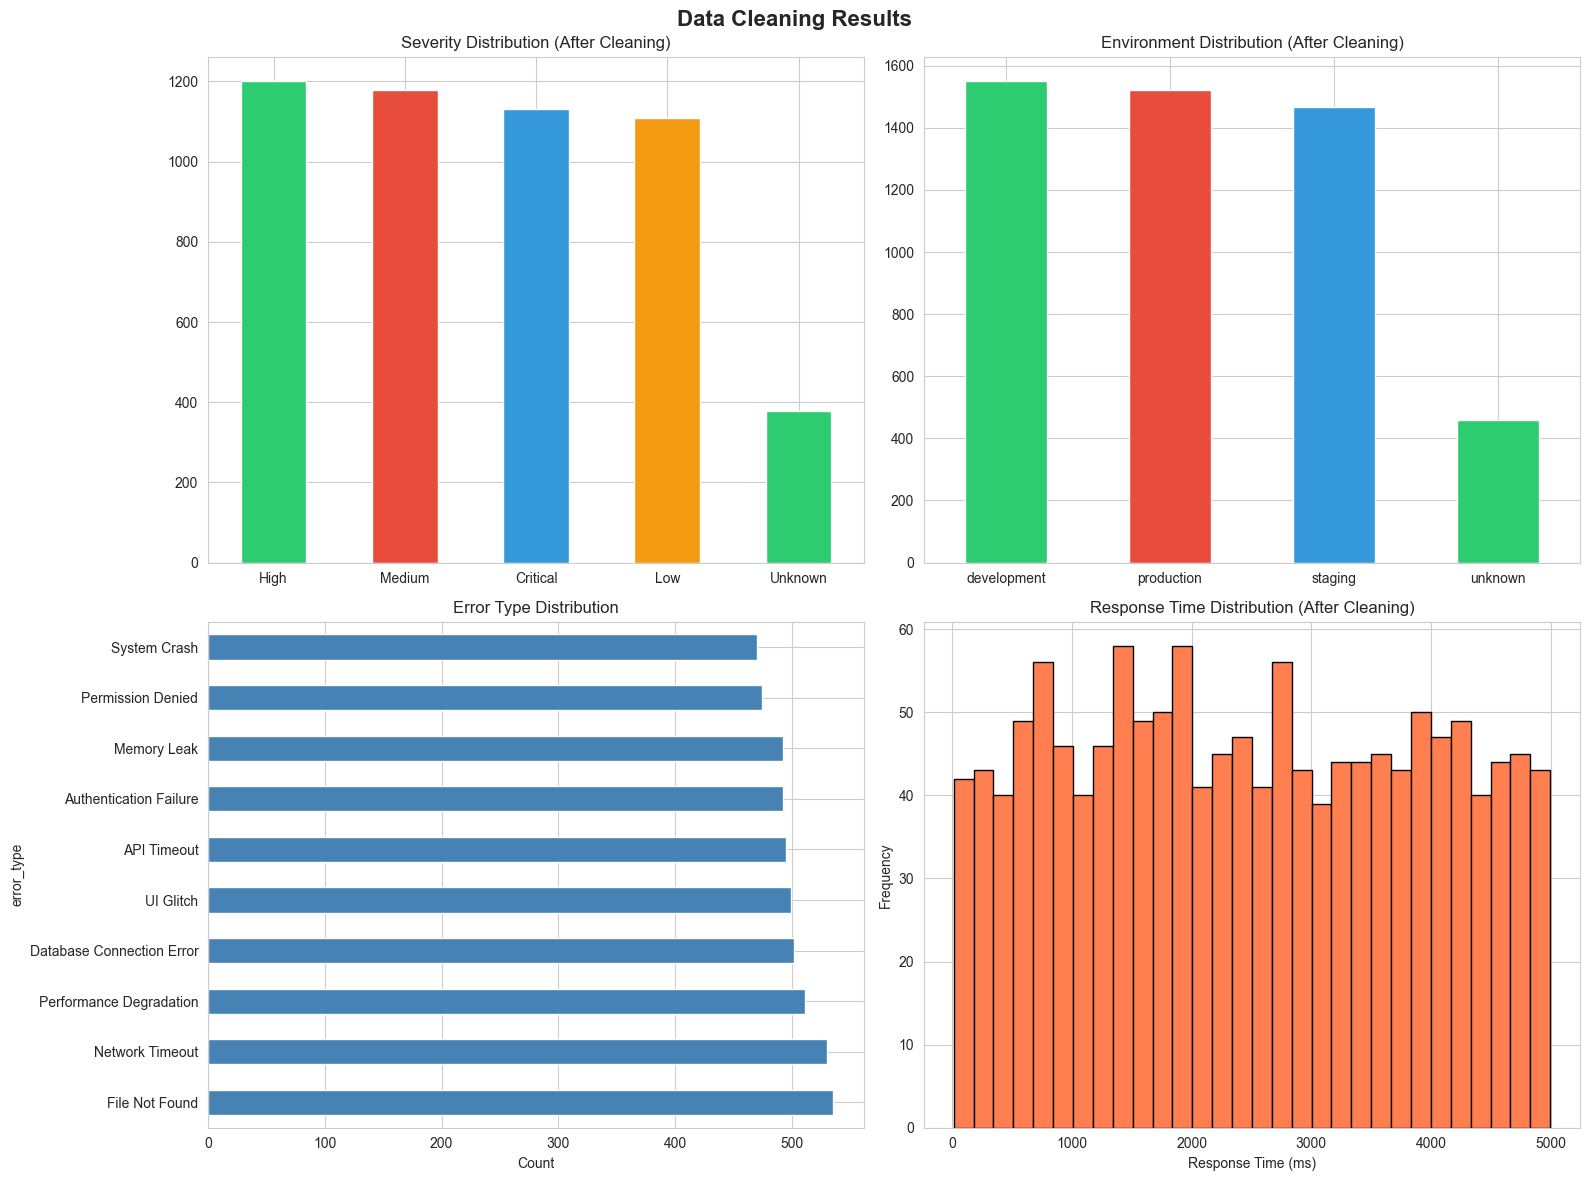

Chart saved to metadata/cleaning_results.png


In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Data Cleaning Results", fontsize=16, fontweight='bold')

colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12']

df_clean['severity'].value_counts().plot(
    kind='bar',
    ax=axes[0][0],
    color=colors
)
axes[0][0].set_title("Severity Distribution (After Cleaning)")
axes[0][0].set_xlabel("")
axes[0][0].tick_params(axis='x', rotation=0)

df_clean['environment'].value_counts().plot(
    kind='bar',
    ax=axes[0][1],
    color=colors[:3]
)
axes[0][1].set_title("Environment Distribution (After Cleaning)")
axes[0][1].set_xlabel("")
axes[0][1].tick_params(axis='x', rotation=0)

df_clean['error_type'].value_counts().plot(
    kind='barh',
    ax=axes[1][0],
    color='steelblue'
)
axes[1][0].set_title("Error Type Distribution")
axes[1][0].set_xlabel("Count")

df_clean['response_time_ms'].dropna().plot(
    kind='hist',
    bins=30,
    ax=axes[1][1],
    color='coral',
    edgecolor='black'
)
axes[1][1].set_title("Response Time Distribution (After Cleaning)")
axes[1][1].set_xlabel("Response Time (ms)")

plt.tight_layout()
plt.savefig("metadata/cleaning_results.png", dpi=150)
plt.show()
print("Chart saved to metadata/cleaning_results.png")

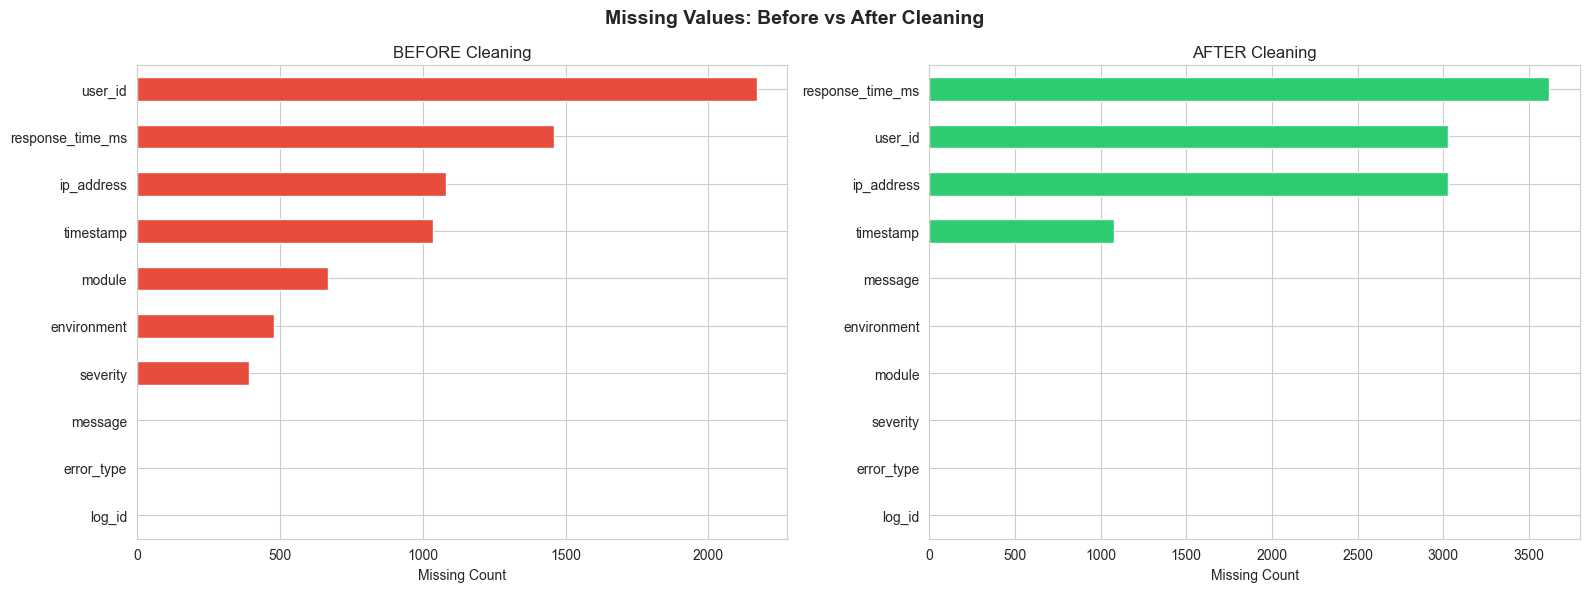

Chart saved to metadata/before_after_missing.png


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Missing Values: Before vs After Cleaning", fontsize=14, fontweight='bold')

before_missing = df_csv.isnull().sum().sort_values(ascending=True)
before_missing.plot(
    kind='barh',
    ax=axes[0],
    color='#e74c3c'
)
axes[0].set_title("BEFORE Cleaning")
axes[0].set_xlabel("Missing Count")

after_missing = df_clean.isnull().sum().sort_values(ascending=True)
after_missing.plot(
    kind='barh',
    ax=axes[1],
    color='#2ecc71'
)
axes[1].set_title("AFTER Cleaning")
axes[1].set_xlabel("Missing Count")

plt.tight_layout()
plt.savefig("metadata/before_after_missing.png", dpi=150)
plt.show()
print("Chart saved to metadata/before_after_missing.png")

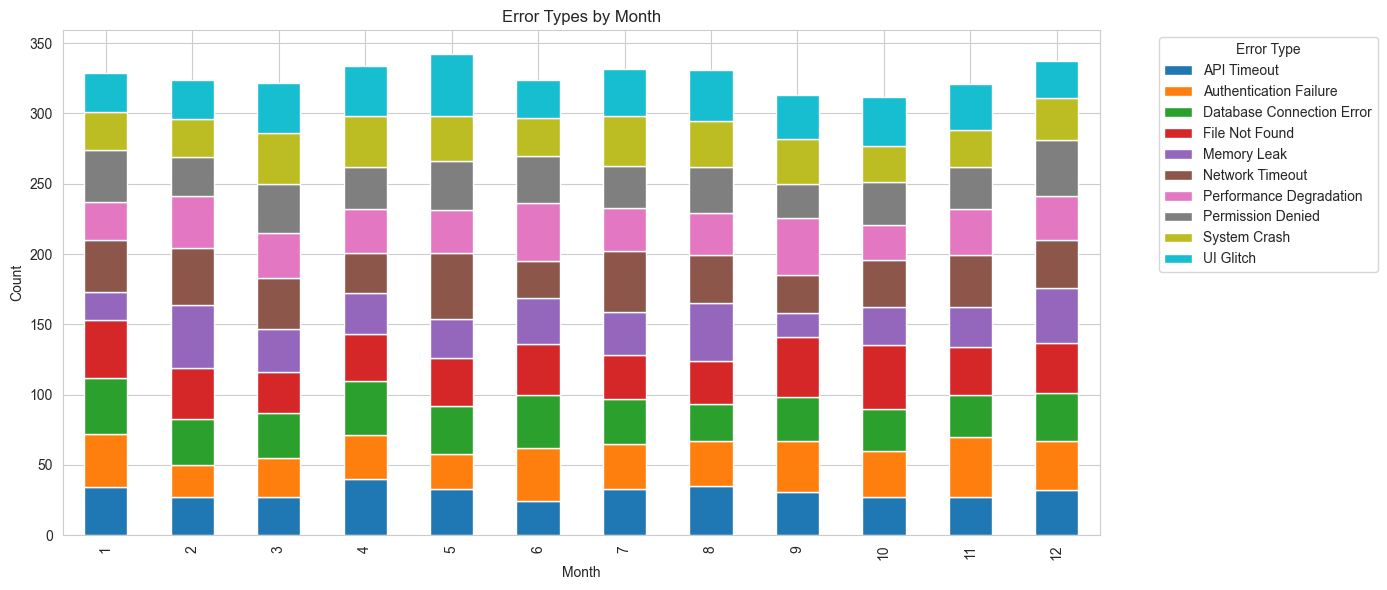

Chart saved to metadata/errors_by_month.png


In [21]:
df_with_time = df_clean[df_clean['timestamp'].notna()].copy()

df_with_time['month'] = df_with_time['timestamp'].dt.month

monthly_errors = df_with_time.groupby(
    ['month', 'error_type']
).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))
monthly_errors.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='tab10'
)
ax.set_title("Error Types by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.legend(title="Error Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("metadata/errors_by_month.png", dpi=150)
plt.show()
print("Chart saved to metadata/errors_by_month.png")

In [22]:
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS - CLEANED DATA")
print("=" * 60)

print("\n1. BASIC STATISTICS")
print("   Total Records: {}".format(len(df_clean)))
print("   Date Range: {} to {}".format(
    df_clean['timestamp'].min(),
    df_clean['timestamp'].max()
))

print("\n2. RESPONSE TIME STATISTICS")
print("   Mean: {} ms".format(
    round(df_clean['response_time_ms'].mean(), 2)
))
print("   Median: {} ms".format(
    round(df_clean['response_time_ms'].median(), 2)
))
print("   Std Dev: {} ms".format(
    round(df_clean['response_time_ms'].std(), 2)
))
print("   Min: {} ms".format(df_clean['response_time_ms'].min()))
print("   Max: {} ms".format(df_clean['response_time_ms'].max()))

print("\n3. ERROR TYPE BREAKDOWN")
print(df_clean['error_type'].value_counts())

print("\n4. SEVERITY BREAKDOWN")
print(df_clean['severity'].value_counts())

print("\n5. ENVIRONMENT BREAKDOWN")
print(df_clean['environment'].value_counts())

print("\n6. MODULE BREAKDOWN")
print(df_clean['module'].value_counts())

print("\n7. TOP 10 MOST ACTIVE USERS")
print(df_clean['user_id'].value_counts().head(10))

EXPLORATORY DATA ANALYSIS - CLEANED DATA

1. BASIC STATISTICS
   Total Records: 5000
   Date Range: 2024-01-01 04:03:00 to 2024-12-30 20:43:00

2. RESPONSE TIME STATISTICS
   Mean: 2480.81 ms
   Median: 2413.0 ms
   Std Dev: 1423.68 ms
   Min: 10.75 ms
   Max: 4996.0 ms

3. ERROR TYPE BREAKDOWN
error_type
File Not Found               535
Network Timeout              530
Performance Degradation      511
Database Connection Error    502
UI Glitch                    499
API Timeout                  495
Authentication Failure       492
Memory Leak                  492
Permission Denied            474
System Crash                 470
Name: count, dtype: int64

4. SEVERITY BREAKDOWN
severity
High        1202
Medium      1179
Critical    1131
Low         1110
Unknown      378
Name: count, dtype: int64

5. ENVIRONMENT BREAKDOWN
environment
development    1552
production     1521
staging        1468
unknown         459
Name: count, dtype: int64

6. MODULE BREAKDOWN
module
api-gateway           

In [23]:
df_clean.to_csv("cleaned_data/clean_server_logs.csv", index=False)
print("Saved: cleaned_data/clean_server_logs.csv")

df_clean.to_json(
    "cleaned_data/clean_server_logs.json",
    orient="records",
    indent=2,
    date_format="iso"
)
print("Saved: cleaned_data/clean_server_logs.json")

df_clean.to_parquet(
    "cleaned_data/clean_server_logs.parquet",
    index=False
)
print("Saved: cleaned_data/clean_server_logs.parquet")

df_clean.to_excel(
    "cleaned_data/clean_server_logs.xlsx",
    index=False
)
print("Saved: cleaned_data/clean_server_logs.xlsx")

print("")
print("All 4 formats exported successfully!")

Saved: cleaned_data/clean_server_logs.csv
Saved: cleaned_data/clean_server_logs.json
Saved: cleaned_data/clean_server_logs.parquet
Saved: cleaned_data/clean_server_logs.xlsx

All 4 formats exported successfully!


In [25]:
import json

clean_cleaning_log = []
for entry in cleaning_log:
    clean_entry = {}
    for key, value in entry.items():
        if hasattr(value, 'item'):
            clean_entry[key] = int(value)
        else:
            clean_entry[key] = value
    clean_cleaning_log.append(clean_entry)

lineage = {
    "project": "Log File Cleaner & Classifier",
    "author": "Kethavath Saidamma",
    "date": "February 2025",
    "source_files": [
        {
            "name": "messy_server_logs.csv",
            "format": "CSV",
            "rows": 5250,
            "columns": 10,
            "size": "655 KB"
        },
        {
            "name": "messy_api_logs.json",
            "format": "JSON",
            "rows": 1000,
            "size": "330 KB"
        }
    ],
    "output_files": [
        "clean_server_logs.csv",
        "clean_server_logs.json",
        "clean_server_logs.parquet",
        "clean_server_logs.xlsx"
    ],
    "cleaning_steps": clean_cleaning_log,
    "final_stats": {
        "original_rows": 5250,
        "cleaned_rows": int(len(df_clean)),
        "rows_removed": int(5250 - len(df_clean)),
        "columns": int(len(df_clean.columns)),
        "remaining_nulls": int(df_clean.isnull().sum().sum())
    }
}

with open("metadata/data_lineage.json", "w") as f:
    json.dump(lineage, f, indent=2)

print("Data lineage saved to metadata/data_lineage.json")
print("")
print(json.dumps(lineage, indent=2))

Data lineage saved to metadata/data_lineage.json

{
  "project": "Log File Cleaner & Classifier",
  "author": "Kethavath Saidamma",
  "date": "February 2025",
  "source_files": [
    {
      "name": "messy_server_logs.csv",
      "format": "CSV",
      "rows": 5250,
      "columns": 10,
      "size": "655 KB"
    },
    {
      "name": "messy_api_logs.json",
      "format": "JSON",
      "rows": 1000,
      "size": "330 KB"
    }
  ],
  "output_files": [
    "clean_server_logs.csv",
    "clean_server_logs.json",
    "clean_server_logs.parquet",
    "clean_server_logs.xlsx"
  ],
  "cleaning_steps": [
    {
      "step": 1,
      "description": "Removed duplicate rows",
      "rows_before": 5250,
      "rows_after": 5000,
      "rows_affected": 250
    },
    {
      "step": 2,
      "description": "Standardized severity levels to Critical/High/Medium/Low",
      "rows_before": 5000,
      "rows_after": 5000,
      "rows_affected": 4622
    },
    {
      "step": 3,
      "description": 

In [26]:
print("=" * 60)
print("PROJECT 1 COMPLETE: LOG FILE CLEANER & CLASSIFIER")
print("=" * 60)
print("")
print("FILES CREATED:")
print("  cleaned_data/clean_server_logs.csv")
print("  cleaned_data/clean_server_logs.json")
print("  cleaned_data/clean_server_logs.parquet")
print("  cleaned_data/clean_server_logs.xlsx")
print("  metadata/data_lineage.json")
print("  metadata/missing_values_chart.png")
print("  metadata/cleaning_results.png")
print("  metadata/before_after_missing.png")
print("  metadata/errors_by_month.png")
print("")
print("CLEANING SUMMARY:")
print("  Duplicates removed: 250")
print("  Severity levels standardized: 12 -> 4")
print("  Environments standardized: 9 -> 3")
print("  Timestamps unified to datetime")
print("  Invalid response times removed")
print("  Invalid IPs cleaned")
print("  User IDs standardized to USR-XXXX")
print("")
print("This project is READY for GitHub! ")

PROJECT 1 COMPLETE: LOG FILE CLEANER & CLASSIFIER

FILES CREATED:
  cleaned_data/clean_server_logs.csv
  cleaned_data/clean_server_logs.json
  cleaned_data/clean_server_logs.parquet
  cleaned_data/clean_server_logs.xlsx
  metadata/data_lineage.json
  metadata/missing_values_chart.png
  metadata/cleaning_results.png
  metadata/before_after_missing.png
  metadata/errors_by_month.png

CLEANING SUMMARY:
  Duplicates removed: 250
  Severity levels standardized: 12 -> 4
  Environments standardized: 9 -> 3
  Timestamps unified to datetime
  Invalid response times removed
  Invalid IPs cleaned
  User IDs standardized to USR-XXXX

This project is READY for GitHub! 
